In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [151]:
 # Import the Dataset
    
Company_Data=pd.read_csv("D:/Data Secience/Assignment/Random Forests/Company_Data.csv")   
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


 ## Exploratory Data Analysis

In [152]:
company=Company_Data.copy()

In [153]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [154]:
 # Drop the Columns
company_df=company.drop(['Age','Education'], axis=1)

In [155]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,Bad,Yes,Yes
1,11.22,111,48,16,260,83,Good,Yes,Yes
2,10.06,113,35,10,269,80,Medium,Yes,Yes
3,7.40,117,100,4,466,97,Medium,Yes,Yes
4,4.15,141,64,3,340,128,Bad,Yes,No


In [156]:
# Data Structure
company_df.shape

(400, 9)

In [157]:
# Data Type
company_df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Urban           object
US              object
dtype: object

In [158]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Urban        400 non-null    object 
 8   US           400 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 28.2+ KB


In [159]:
# Duplicates
company_df[company_df.duplicated()].shape

(0, 9)

<AxesSubplot:>

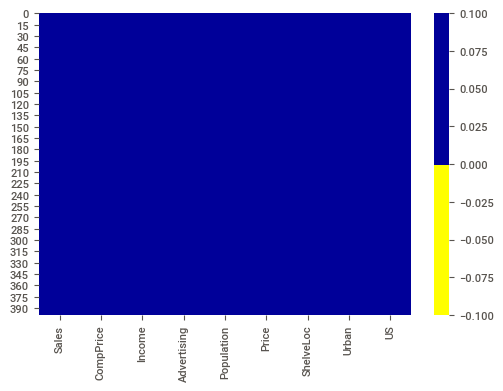

In [160]:
# Missing values and Imputation
cols=company_df.columns
colours=['#ffff00','#000099']
sns.heatmap(company_df[cols].isnull(),
           cmap=sns.color_palette(colours))

In [161]:
company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Urban          0
US             0
dtype: int64

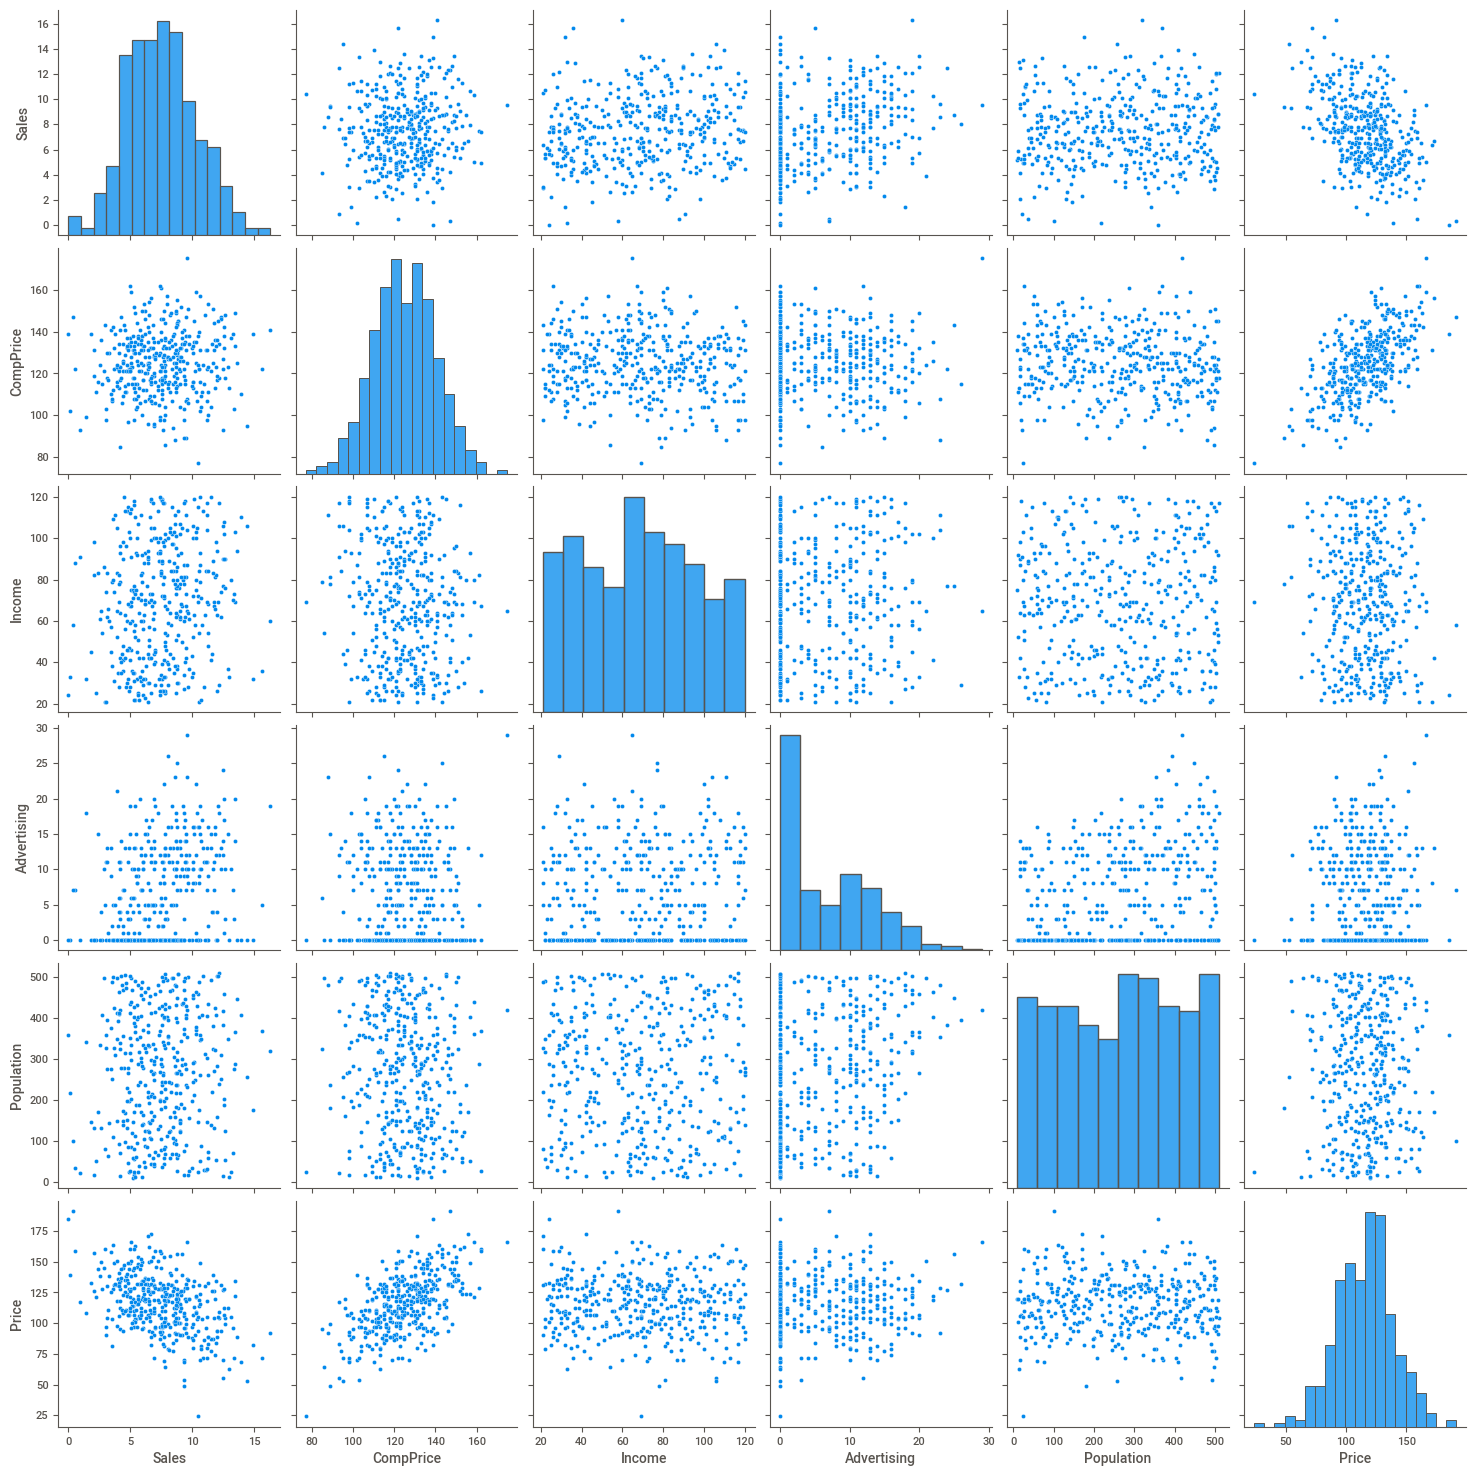

In [162]:
# Scatter plot and Correlation Analysis
sns.pairplot(company_df)

In [40]:
company_df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000


In [22]:
import sweetviz as sv
sweet_report=sv.analyze(company_df)
sweet_report.show_html("Random Forest_Company_Data_EDA_Report.html")


Report Random Forest_Company_Data_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [163]:
# Convert Sale data into Categorical
company_df1.loc[company_df["Sales"]>=8,"sales"]="1" #High=1
company_df1.loc[company_df["Sales"]<=8,"sales"]="0" #Low=0

In [167]:
company_df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US,sales
0,138,73,11,276,120,0,1,1,1
1,111,48,16,260,83,1,1,1,1
2,113,35,10,269,80,2,1,1,1
3,117,100,4,466,97,2,1,1,0
4,141,64,3,340,128,0,1,0,0


 ## LabelEncoder

In [168]:
labelencoder=LabelEncoder

In [169]:
cols=['ShelveLoc','Urban','US']

In [171]:
company_df1[cols]=company_df1[cols].apply(LabelEncoder().fit_transform)

In [172]:
company_df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US,sales
0,138,73,11,276,120,0,1,1,1
1,111,48,16,260,83,1,1,1,1
2,113,35,10,269,80,2,1,1,1
3,117,100,4,466,97,2,1,1,0
4,141,64,3,340,128,0,1,0,0


### Note- ShelveLoc= Bad=0, Good=1, Medium=2, Urban=Yes=1, No=0, US=Yes=1, No=0 and Sales= High=1, Low=0

 ## Random Forest Classification

In [208]:
X=company_df1.iloc[:,0:8]
Y=company_df1['sales']

num_trees=100
max_features=3
kfold=KFold(n_splits=10, random_state=40, shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results=cross_val_score(model, X,Y, cv=kfold)

In [179]:
results

array([0.825, 0.9  , 0.9  , 0.75 , 0.875, 0.8  , 0.8  , 0.725, 0.8  ,
       0.775])

In [185]:
print(results.mean())

0.8150000000000001


 ## Splitting data into Training and Testing Dataset

In [209]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=40)

In [210]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [219]:
y_pred= model.predict(x_test)
pd.Series(y_pred).value_counts()

0    50
1    30
dtype: int64

In [220]:
y_pred

array(['1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0',
       '0', '0'], dtype=object)

 ## Confusion Matrix

In [230]:
from sklearn.metrics import classification_report
cm=pd.crosstab(y_test, y_pred)

In [231]:
cm

col_0,0,1
sales,,
0,46,7
1,4,23


 ## Interpretation 
 ### 81% data was classified correctly as per Random Forest model
### As per above analysis CompPrice,Income, Advertising, Population, Price, ShelveLoc cause for High Sales to the company
 